    Based on the total movies released each year draw a comparison between the viewership and the total content released

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

    For clean visualization, set matplotlib config.

In [2]:
plt.rc('font', size=12) #controls default text sizes
plt.rc('axes', titlesize=14) #fontsize of the axes title
plt.rc('axes', labelsize=12) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the tick labels
plt.rc('ytick', labelsize=12) #fontsize of the tick labels
plt.rc('legend', fontsize=12) #legend fontsize
plt.rc('figure', titlesize=14) #fontsize of the figure title
plt.rcParams['figure.dpi'] = 300 #high resolution
sns.set_style('whitegrid')

In [3]:
try:    
    data = pd.read_csv("netflix_titles.csv")
    print(data.shape)
except Exception as e:
    print(e)

(8807, 12)


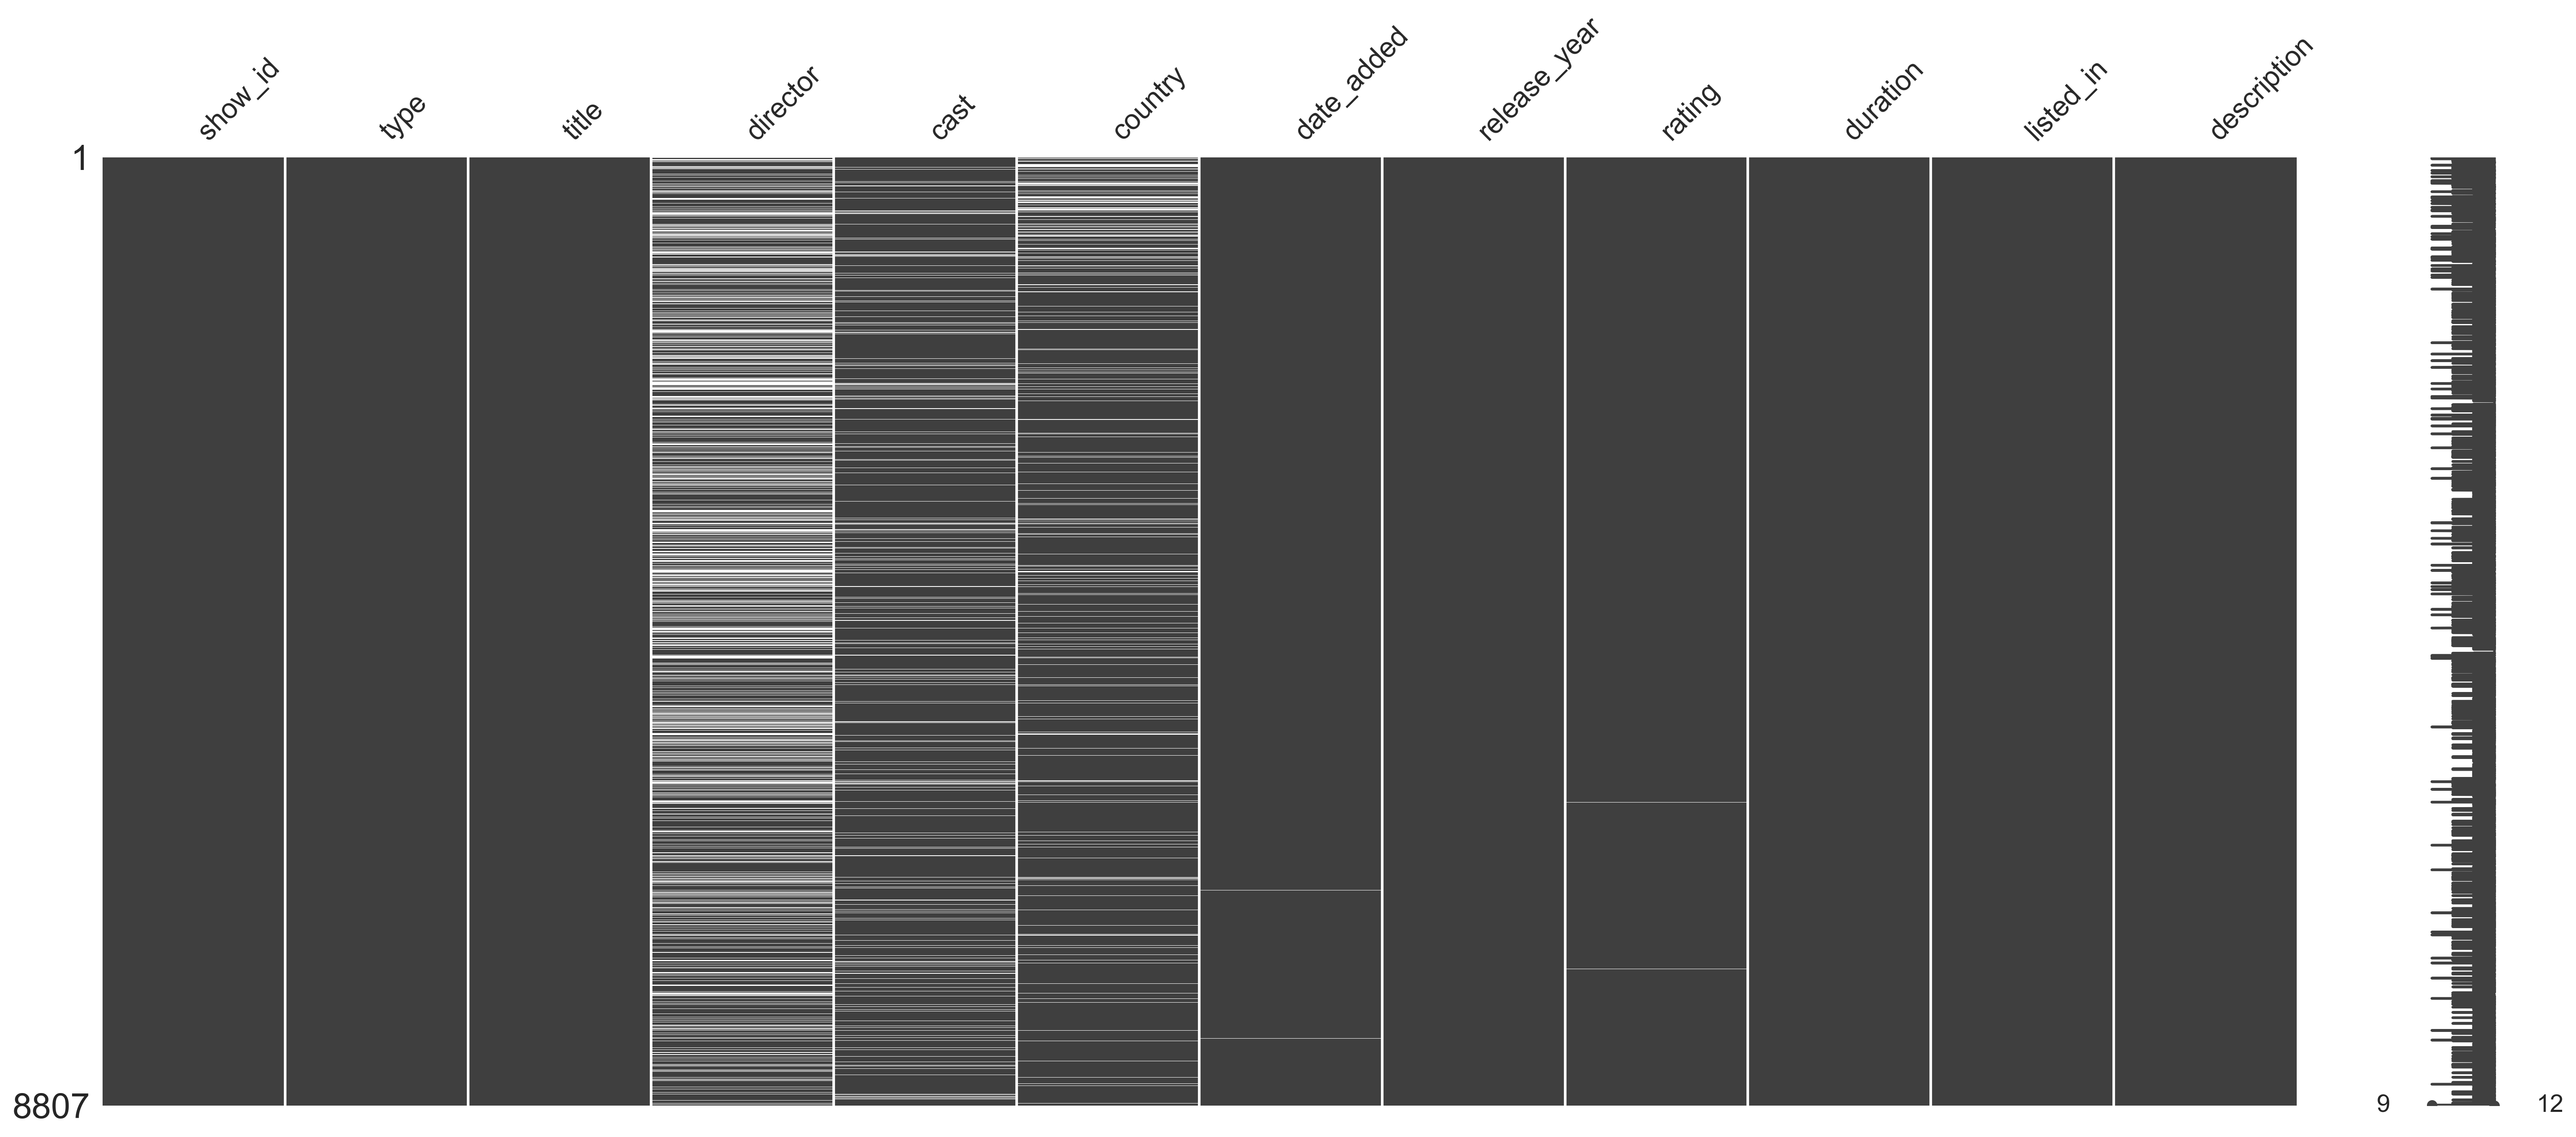

In [4]:
msno.matrix(data)
plt.show()

In [5]:
for i in data.columns:
    null_rate = data[i].isna().sum() / len(data) * 100 
    if null_rate:
        print(f"{i}'s null rate : {null_rate}%")

director's null rate : 29.908027705234474%
cast's null rate : 9.367548540933349%
country's null rate : 9.435676166685592%
date_added's null rate : 0.11354604292040424%
rating's null rate : 0.04541841716816169%
duration's null rate : 0.034063812876121265%


    Three elements with lot of null data - director, cast and country.
    1. director: Only the director who has taken the most work seems to be able to visualize it separately.
    2. cast may be assumed to be zero if converted to number of people.
    3. country also seems to be classified as none.

<font color=green>Closer look at the data</font>

In [6]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


    Let's also take a quick look at the unique count and frequency.

In [7]:
data.describe(include='all').head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.0,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4


    First of all, show_id and description do not seem to have anything to visualize right now.

    With show id, you can EDA the characteristics of the show id and the elements of the movie. The description may be visualized by country differences, year differences or word clouds.

In [8]:
data = data.fillna('NULL')
data['year_added'] = data['date_added'].apply(lambda x :  x.split(',')[-1])
data['year_added'] = data['year_added'].apply(lambda x : x if x != 'NULL' else '2020')
data['year_added'] = data['year_added'].apply(int)

In [9]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NULL,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NULL,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NULL,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,NULL,NULL,NULL,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,NULL,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019
8803,s8804,TV Show,Zombie Dumb,NULL,NULL,NULL,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020


    For analysis, make movie data & TV Show data.

In [10]:
movie = data[data['type'] == 'Movie']
tv_show = data[data['type'] == 'TV Show']

    Why Netflix's Video Count Soared?

    It is clear that Netflix is ​​now the largest company in the field of film / drama. This time, let's take a look at how Netflix grew and how it looks like data.

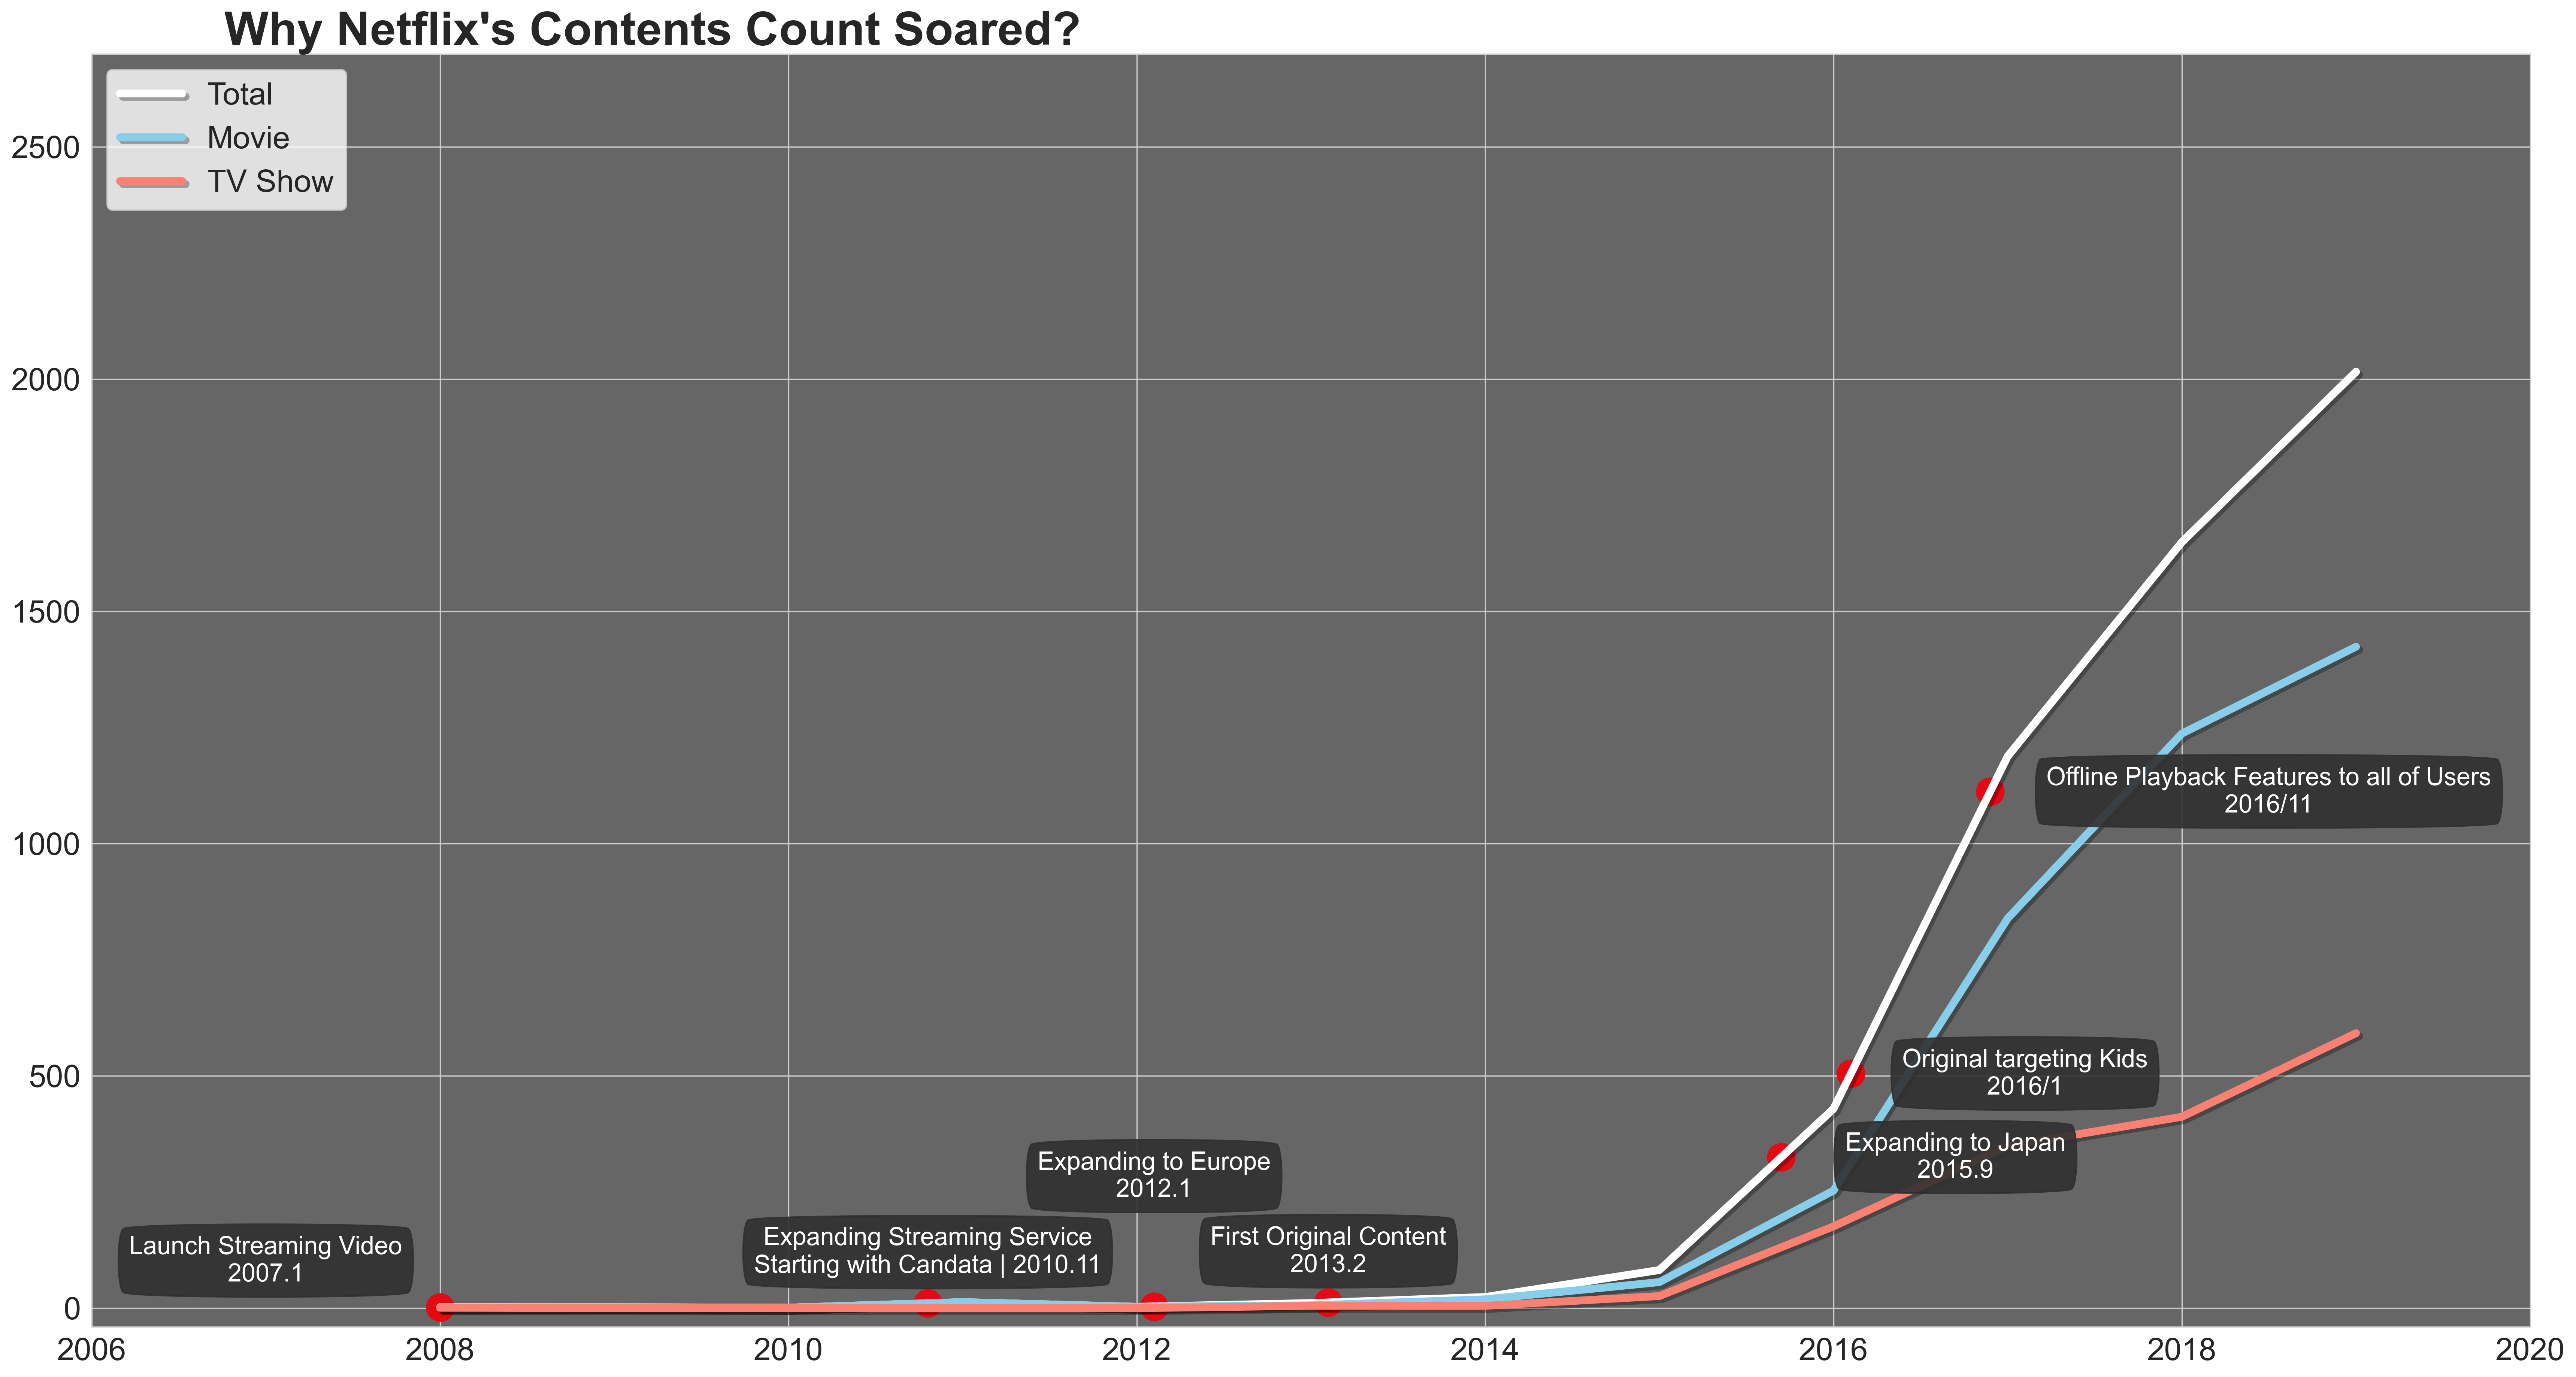

In [42]:
import matplotlib.patheffects as path_effects

year_data = data["year_added"].value_counts().sort_index().loc[:2019]
type_data = (
    data.groupby("type")["year_added"]
    .value_counts()
    .sort_index()
    .unstack()
    .fillna(0)
    .T.loc[:2019]
)

fig, ax = plt.subplots(1, 1, figsize=(28, 15))
ax.plot(
    year_data.index,
    year_data,
    color="white",
    linewidth=5,
    label="Total",
    path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()],
)
ax.plot(
    type_data.index,
    type_data["Movie"],
    color="skyblue",
    linewidth=5,
    label="Movie",
    path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()],
)
ax.plot(
    type_data.index,
    type_data["TV Show"],
    color="salmon",
    linewidth=5,
    label="TV Show",
    path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()],
)

ax.set_xlim(2006, 2020)
ax.set_ylim(-40, 2700)

t = [2008, 2010.8, 2012.1, 2013.1, 2015.7, 2016.1, 2016.9]

events = [
    "Launch Streaming Video\n2007.1",
    "Expanding Streaming Service\nStarting with Candata | 2010.11",
    "Expanding to Europe\n2012.1",
    "First Original Content\n2013.2",
    "Expanding to Japan\n2015.9",
    "Original targeting Kids\n2016/1",
    "Offline Playback Features to all of Users\n2016/11",
]

up_down = [100, 110, 280, 110, 0, 0, 0]

left_right = [-1, 0, 0, 0, 1, 1, 1.6]

for t_i, event_i, ud_i, lr_i in zip(t, events, up_down, left_right):
    ax.annotate(
        event_i,
        xy=(
            t_i + lr_i,
            year_data[int(t_i)] * (int(t_i + 1) - t_i)
            + year_data[int(t_i) + 1] * (t_i - int(t_i))
            + ud_i,
        ),
        xytext=(0, 0),
        textcoords="offset points",
        va="center",
        ha="center",
        color="w",
        fontsize=16,
        bbox=dict(boxstyle="round4", pad=0.5, color="#303030", alpha=0.90),
    )

    # A proportional expression to draw the middle of the year
    ax.scatter(
        t_i,
        year_data[int(t_i)] * (int(t_i + 1) - t_i)
        + year_data[int(t_i) + 1] * (t_i - int(t_i)),
        color="#E50914",
        s=300,
    )

ax.set_facecolor((0.4, 0.4, 0.4))
ax.set_title(
    "Why Netflix's Contents Count Soared?",
    position=(0.23, 1.0 + 0.03),
    fontsize=30,
    fontweight="bold",
)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
plt.legend(loc="upper left", fontsize=20)

plt.show()

try:
    image_format = "svg"
    image_name = "Netflix_Contents_Count_Soared.svg"
    fig.savefig(r"images/"+image_name, image_format=image_format, dpi=120)
except Exception as e:
    print(e)

Everyone knows the tremendous growth since the launch of the streaming service.

You can see this growth only by looking at the content of the data_add.

Whenever they go overseas, they have added the country's content to Netflix and can assume that the content continues to be produced with positive feedback.

<hr/>

And the number of movies decreases, the TV show increases, and you can see that each number is reversed.


    Which country produces the most Contents?

In [16]:
from collections import Counter

country_data = data["country"]
country_counting = pd.Series(
    dict(
        Counter(",".join(country_data).replace(" ,", ",").replace(", ", ",").split(","))
    )
).sort_values(ascending=False)
country_counting.drop(["NULL"], axis=0, inplace=True)


    Let's count on the other side for a moment, and using the Pareto principle(80/20 rule) can help you visualize your data.

In [17]:
tot = sum(country_counting)
top20 = sum(country_counting[:20])  # 22 is real 20% but for simple processing

print(f"total : {tot}")
print(f"top 20 countries : {top20}")
print(f"percentage : {top20}/{tot} = {100 * top20/tot}")


total : 10019
top 20 countries : 8694
percentage : 8694/10019 = 86.77512725820941


    So this time, let's visualize only the top 20 countries.

    Bar Plot & Pie Plot

In [18]:
top20_country = country_counting[:20]


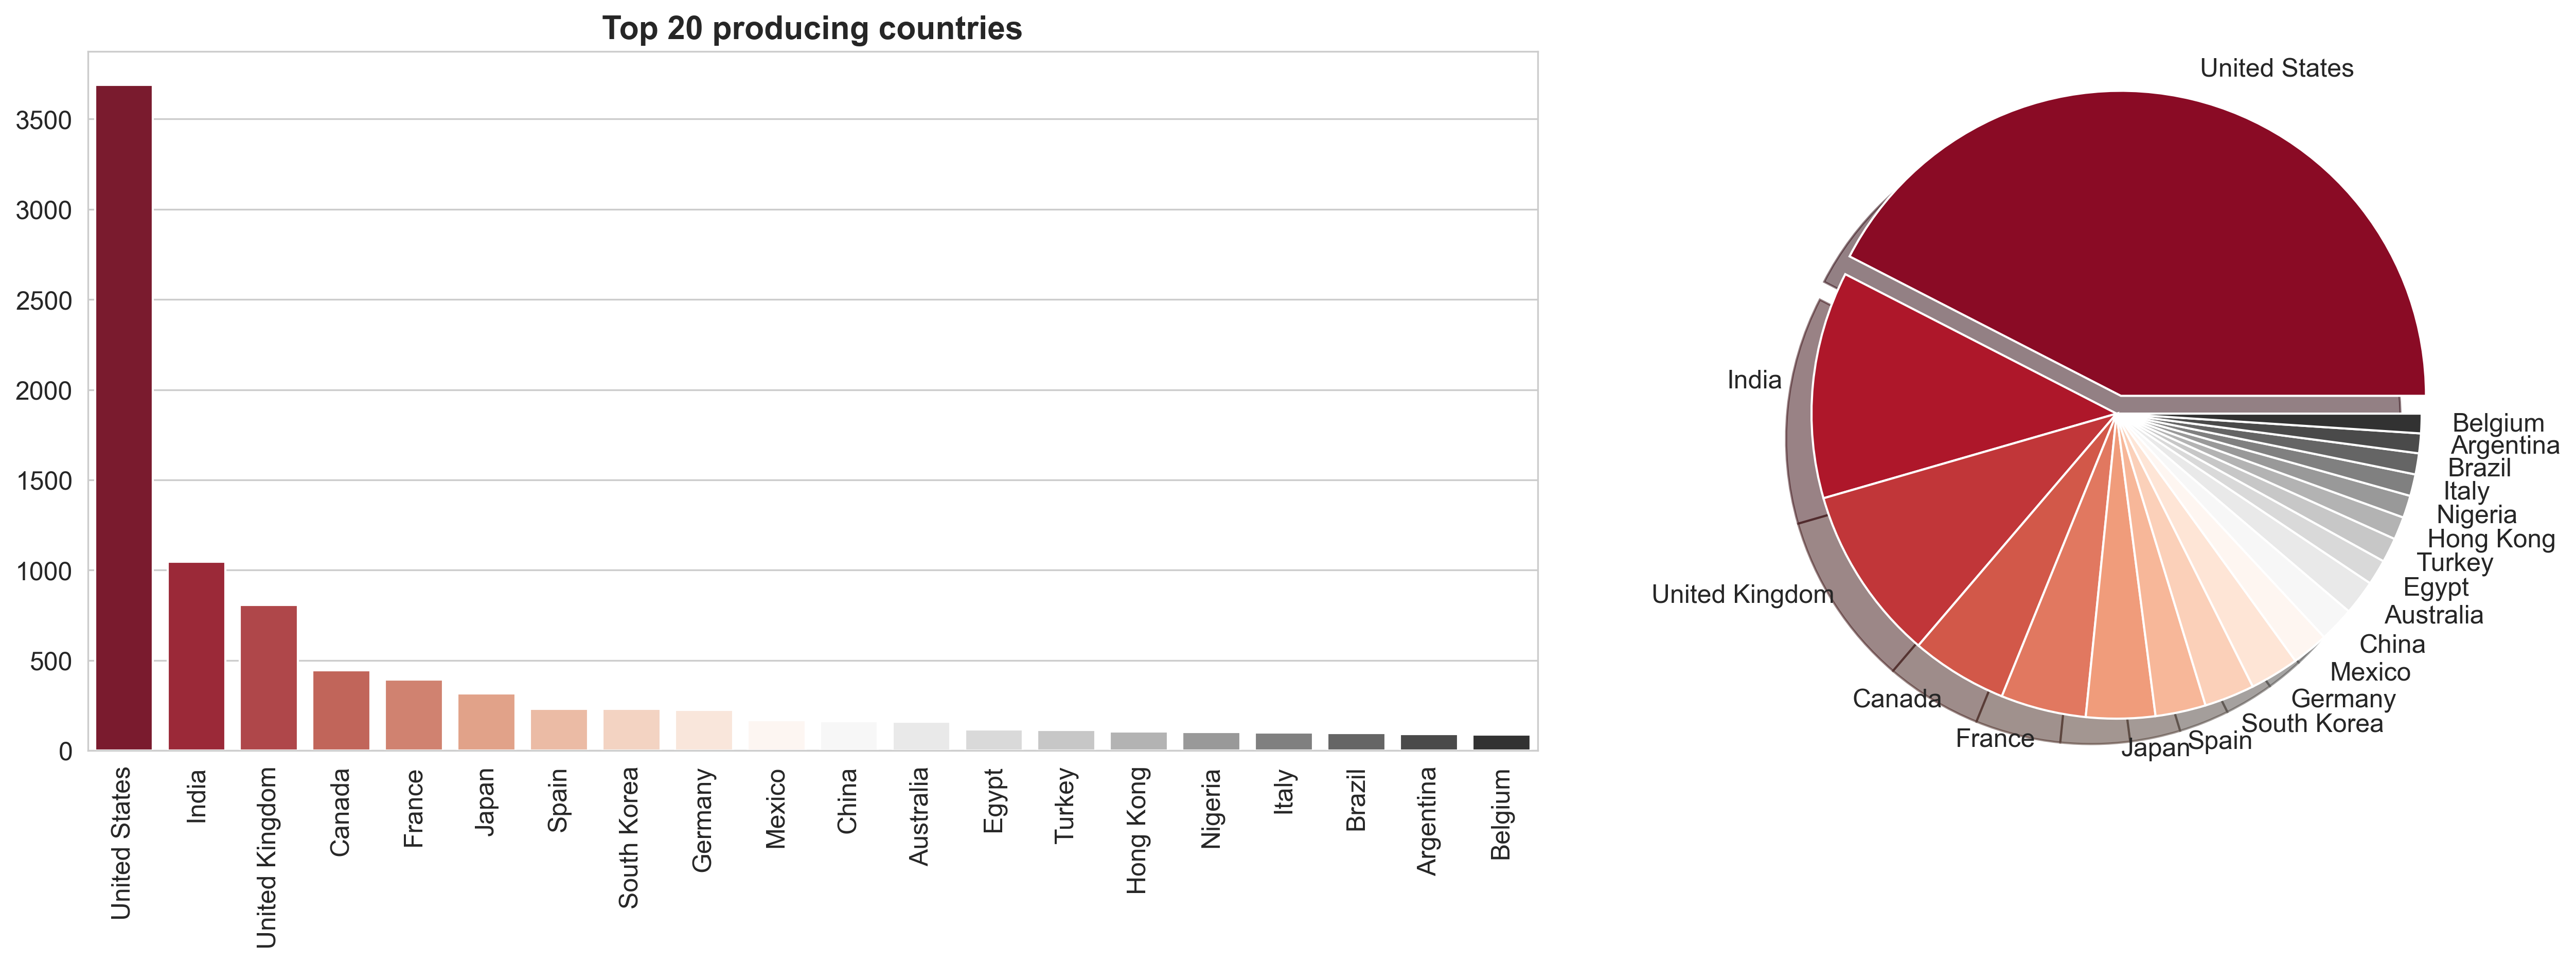

Images saved successfully


In [44]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top20_country.index, top20_country, ax=ax, palette="RdGy")
ax.set_xticklabels(top20_country.index, rotation="90")
ax.set_title("Top 20 producing countries", fontsize=15, fontweight="bold")

explode = [0 for _ in range(20)]
explode[0] = 0.06

ax2 = plt.subplot(gs[1])
ax2.pie(
    top20_country,
    labels=top20_country.index,
    shadow=True,
    startangle=0,
    explode=explode,
    colors=sns.color_palette("RdGy", n_colors=20),
)
ax2.axis("equal")

plt.show()

try:
    image_name = "bar_pie_plots_20_countries.svg"
    fig.savefig(r"images/"+image_name, image_format=image_format, dpi=1200)
    print("Images saved successfully")
except Exception as e:
    print(e)


<center>Clearly, we can see that the US is close to 40%.</center>

    TreeMap | Waffle (Mosaic plot)

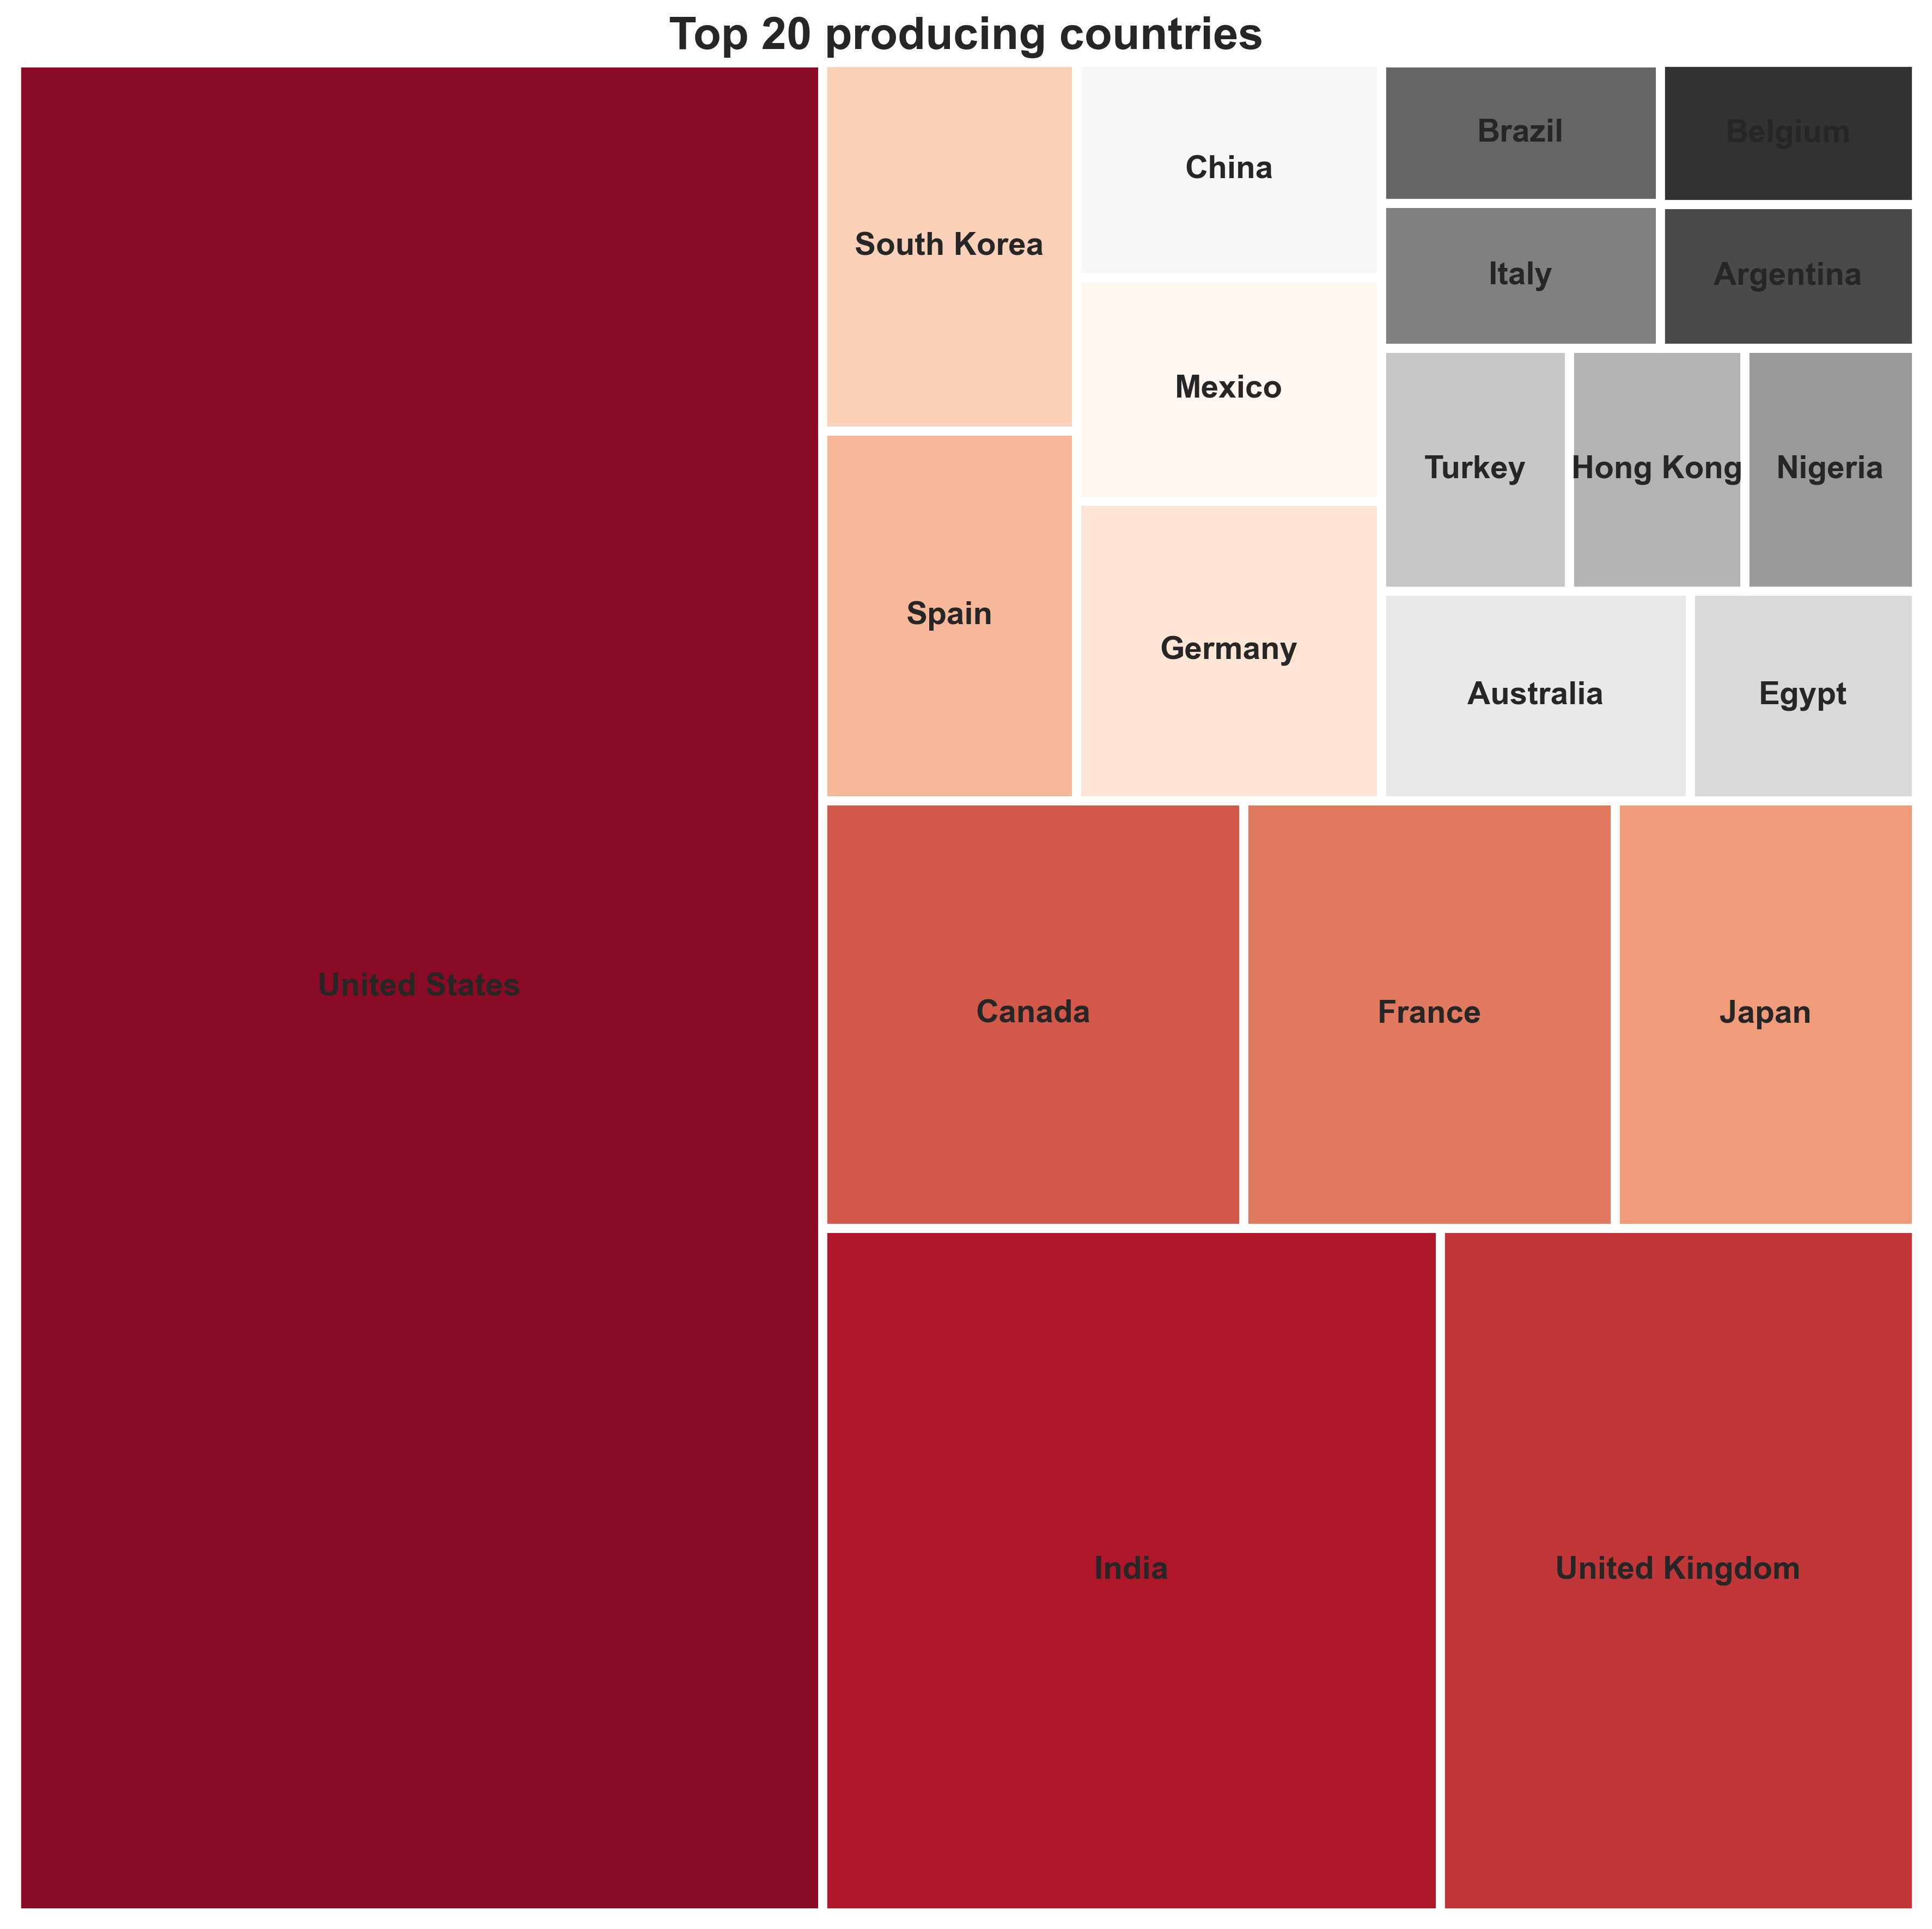

In [21]:
import squarify

y = top20_country
fig = plt.figure(figsize=(15, 15))
squarify.plot(
    sizes=y.values,
    label=y.index,
    color=sns.color_palette("RdGy", n_colors=20),
    linewidth=4,
    text_kwargs={"fontsize": 14, "fontweight": "bold"},
)
plt.title(
    "Top 20 producing countries",
    position=(0.5, 1.0 + 0.03),
    fontsize=20,
    fontweight="bold",
)
plt.axis("off")
plt.show()


<center>Clearly, the <b>United States</b> is the beginning, and as a content powerhouse, it accounts for 40% of the top 20.</center>

<center><b>Canada</b> is at the top of the list as it spread through Canada.</center>

<center><b>China</b> is probably banned, or know that it is developing and using its own app, so the number itself is very small.</center>

<center>Probably, if you draw a rough graph of country population, you'll get a more meaningful graph.</center>

<hr/>

<center>If you want to draw something similar to a mosaic graph, it is recommended to draw a waffle chart. The graph is shown below.</center>

In [23]:
from pywaffle import Waffle

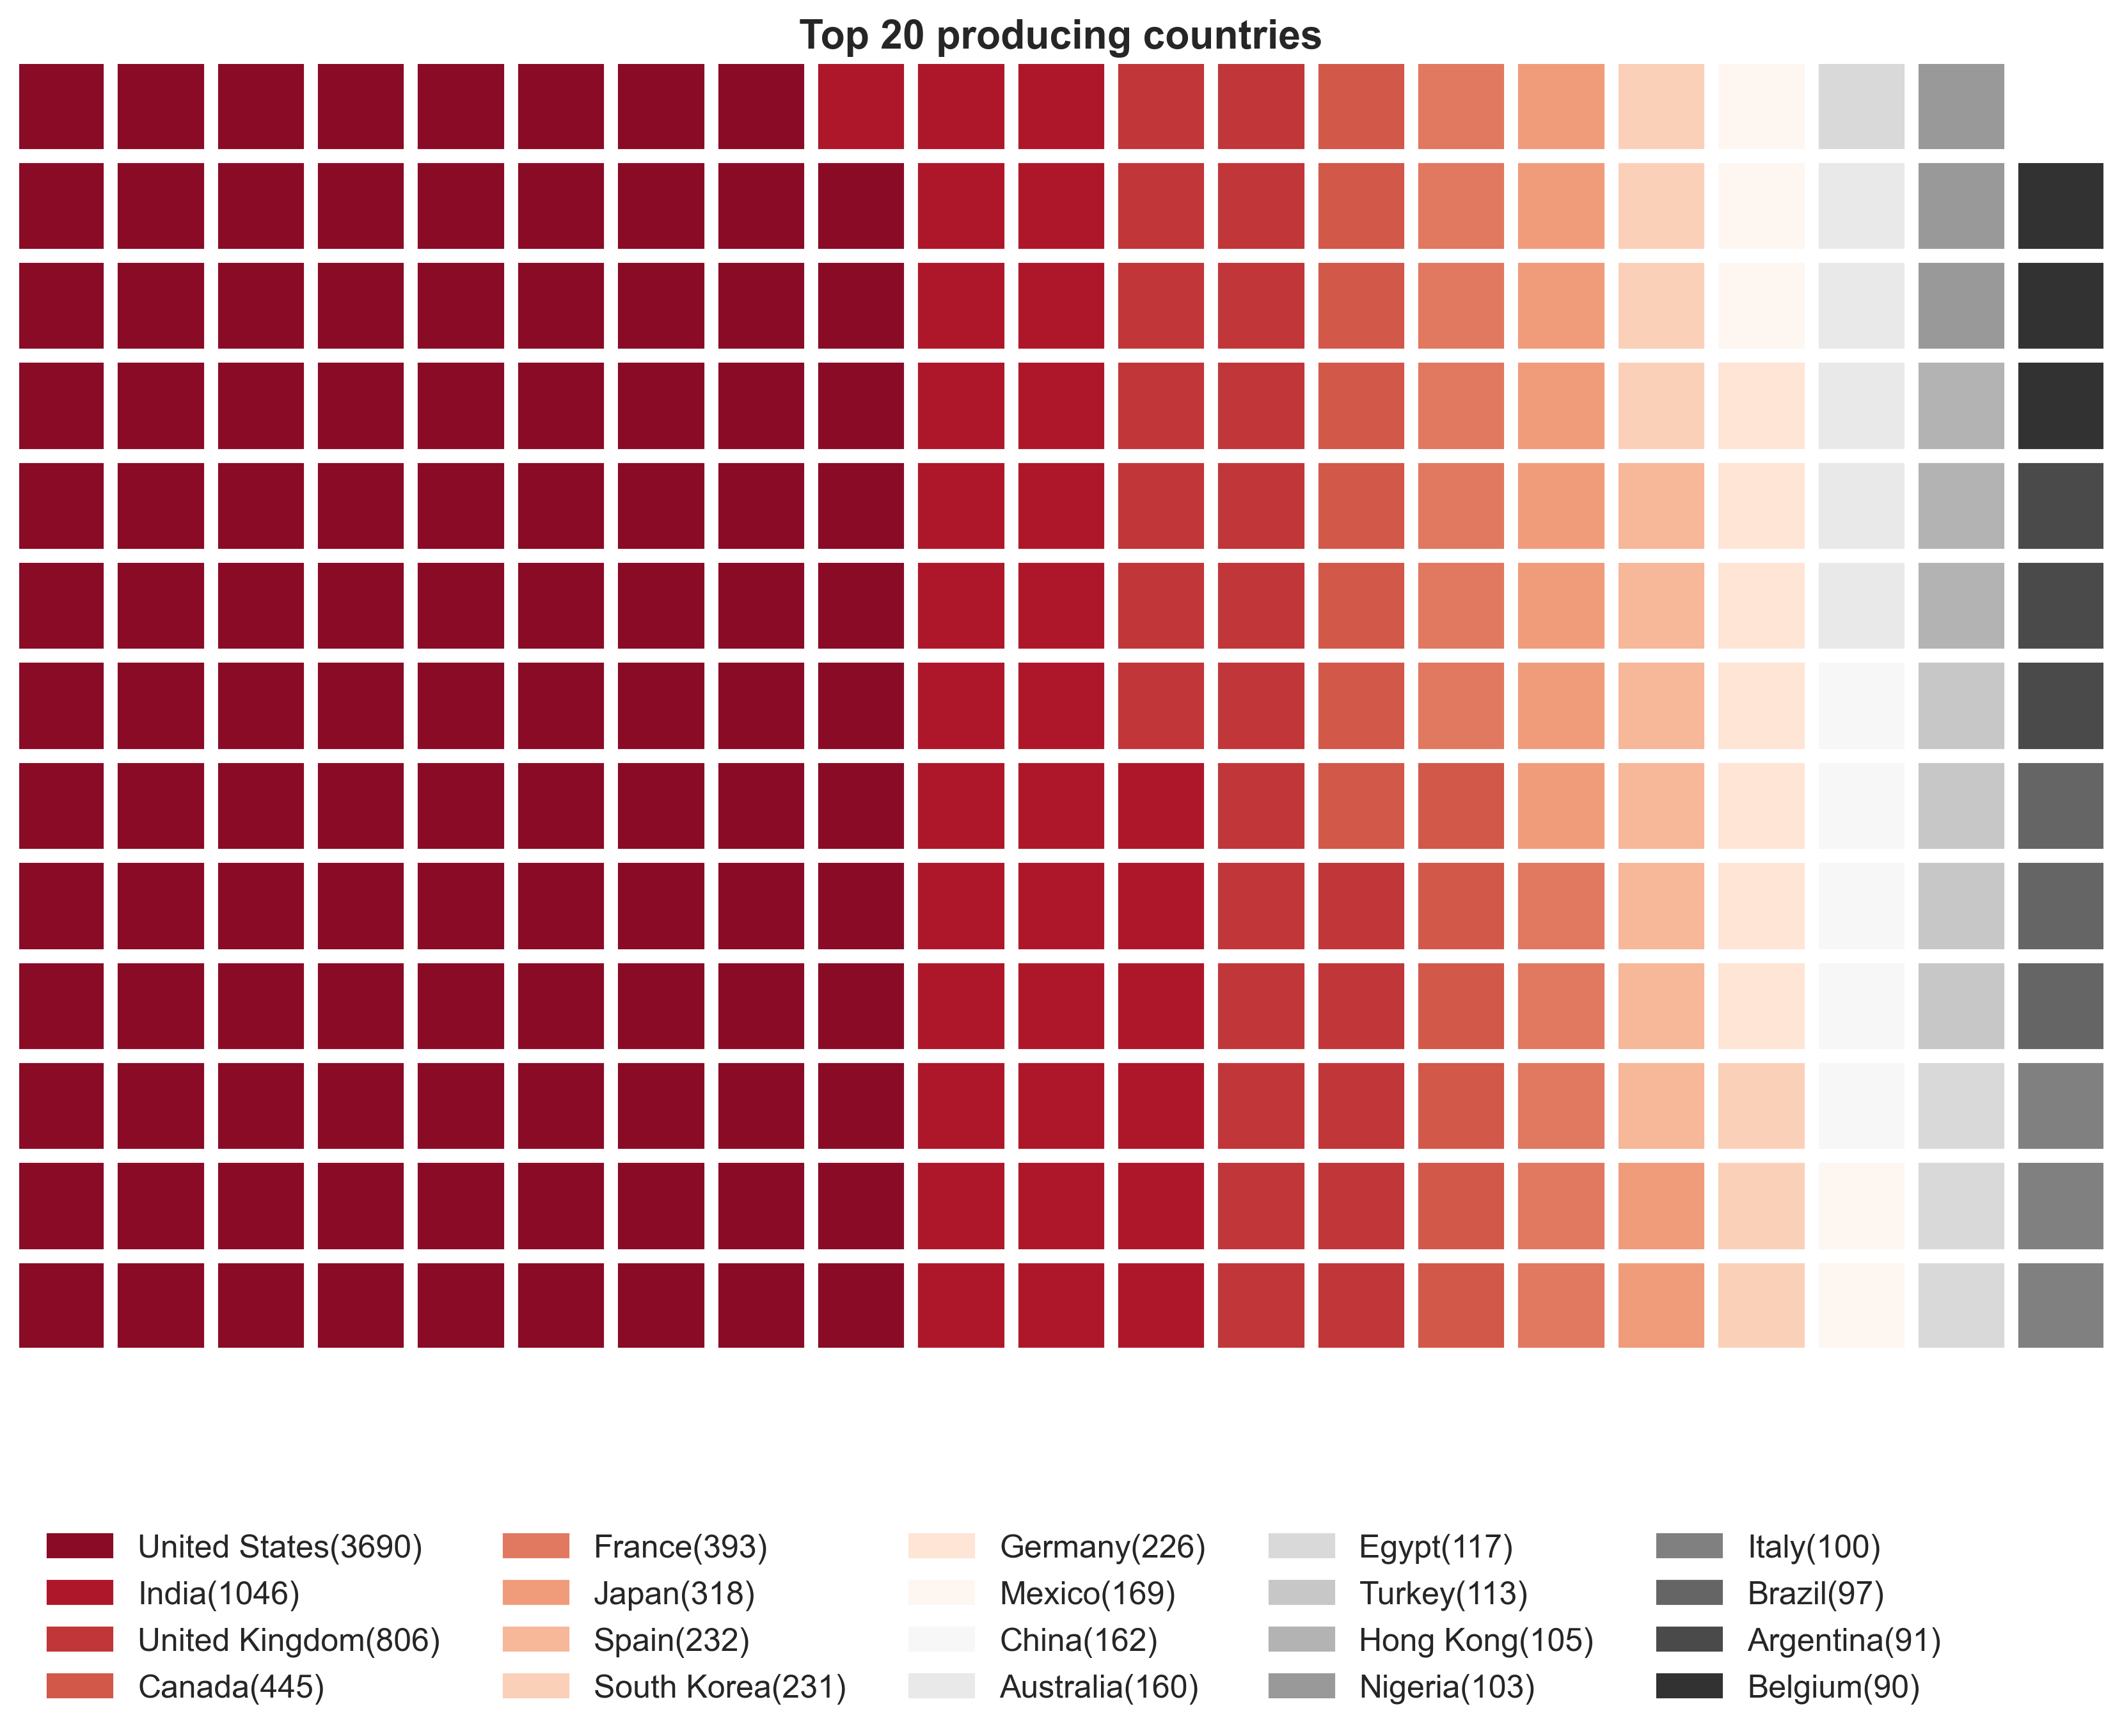

Image saved successfully


In [45]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=13,
    columns=21,
    values=y,
    labels=["{}({})".format(a, b) for a, b in zip(y.index, y)],
    colors=sns.color_palette("RdGy", n_colors=20),
    legend={
        "loc": "lower left",
        "bbox_to_anchor": (0, -0.3),
        "ncol": len(y) // 4,
        "framealpha": 0,
    },
    font_size=15,
    figsize=(12, 12),
    icon_legend=True,
)

plt.title(
    "Top 20 producing countries",
    position=(0.5, 1.0 + 0.03),
    fontsize=15,
    fontweight="bold",
)
plt.show()

try:
    image_name = "heatmap_top_20_countries.svg"
    fig.savefig(r"images/"+image_name, image_format=image_format, dpi=1200)
    print("Image saved successfully")
except Exception as e:
    print(e)


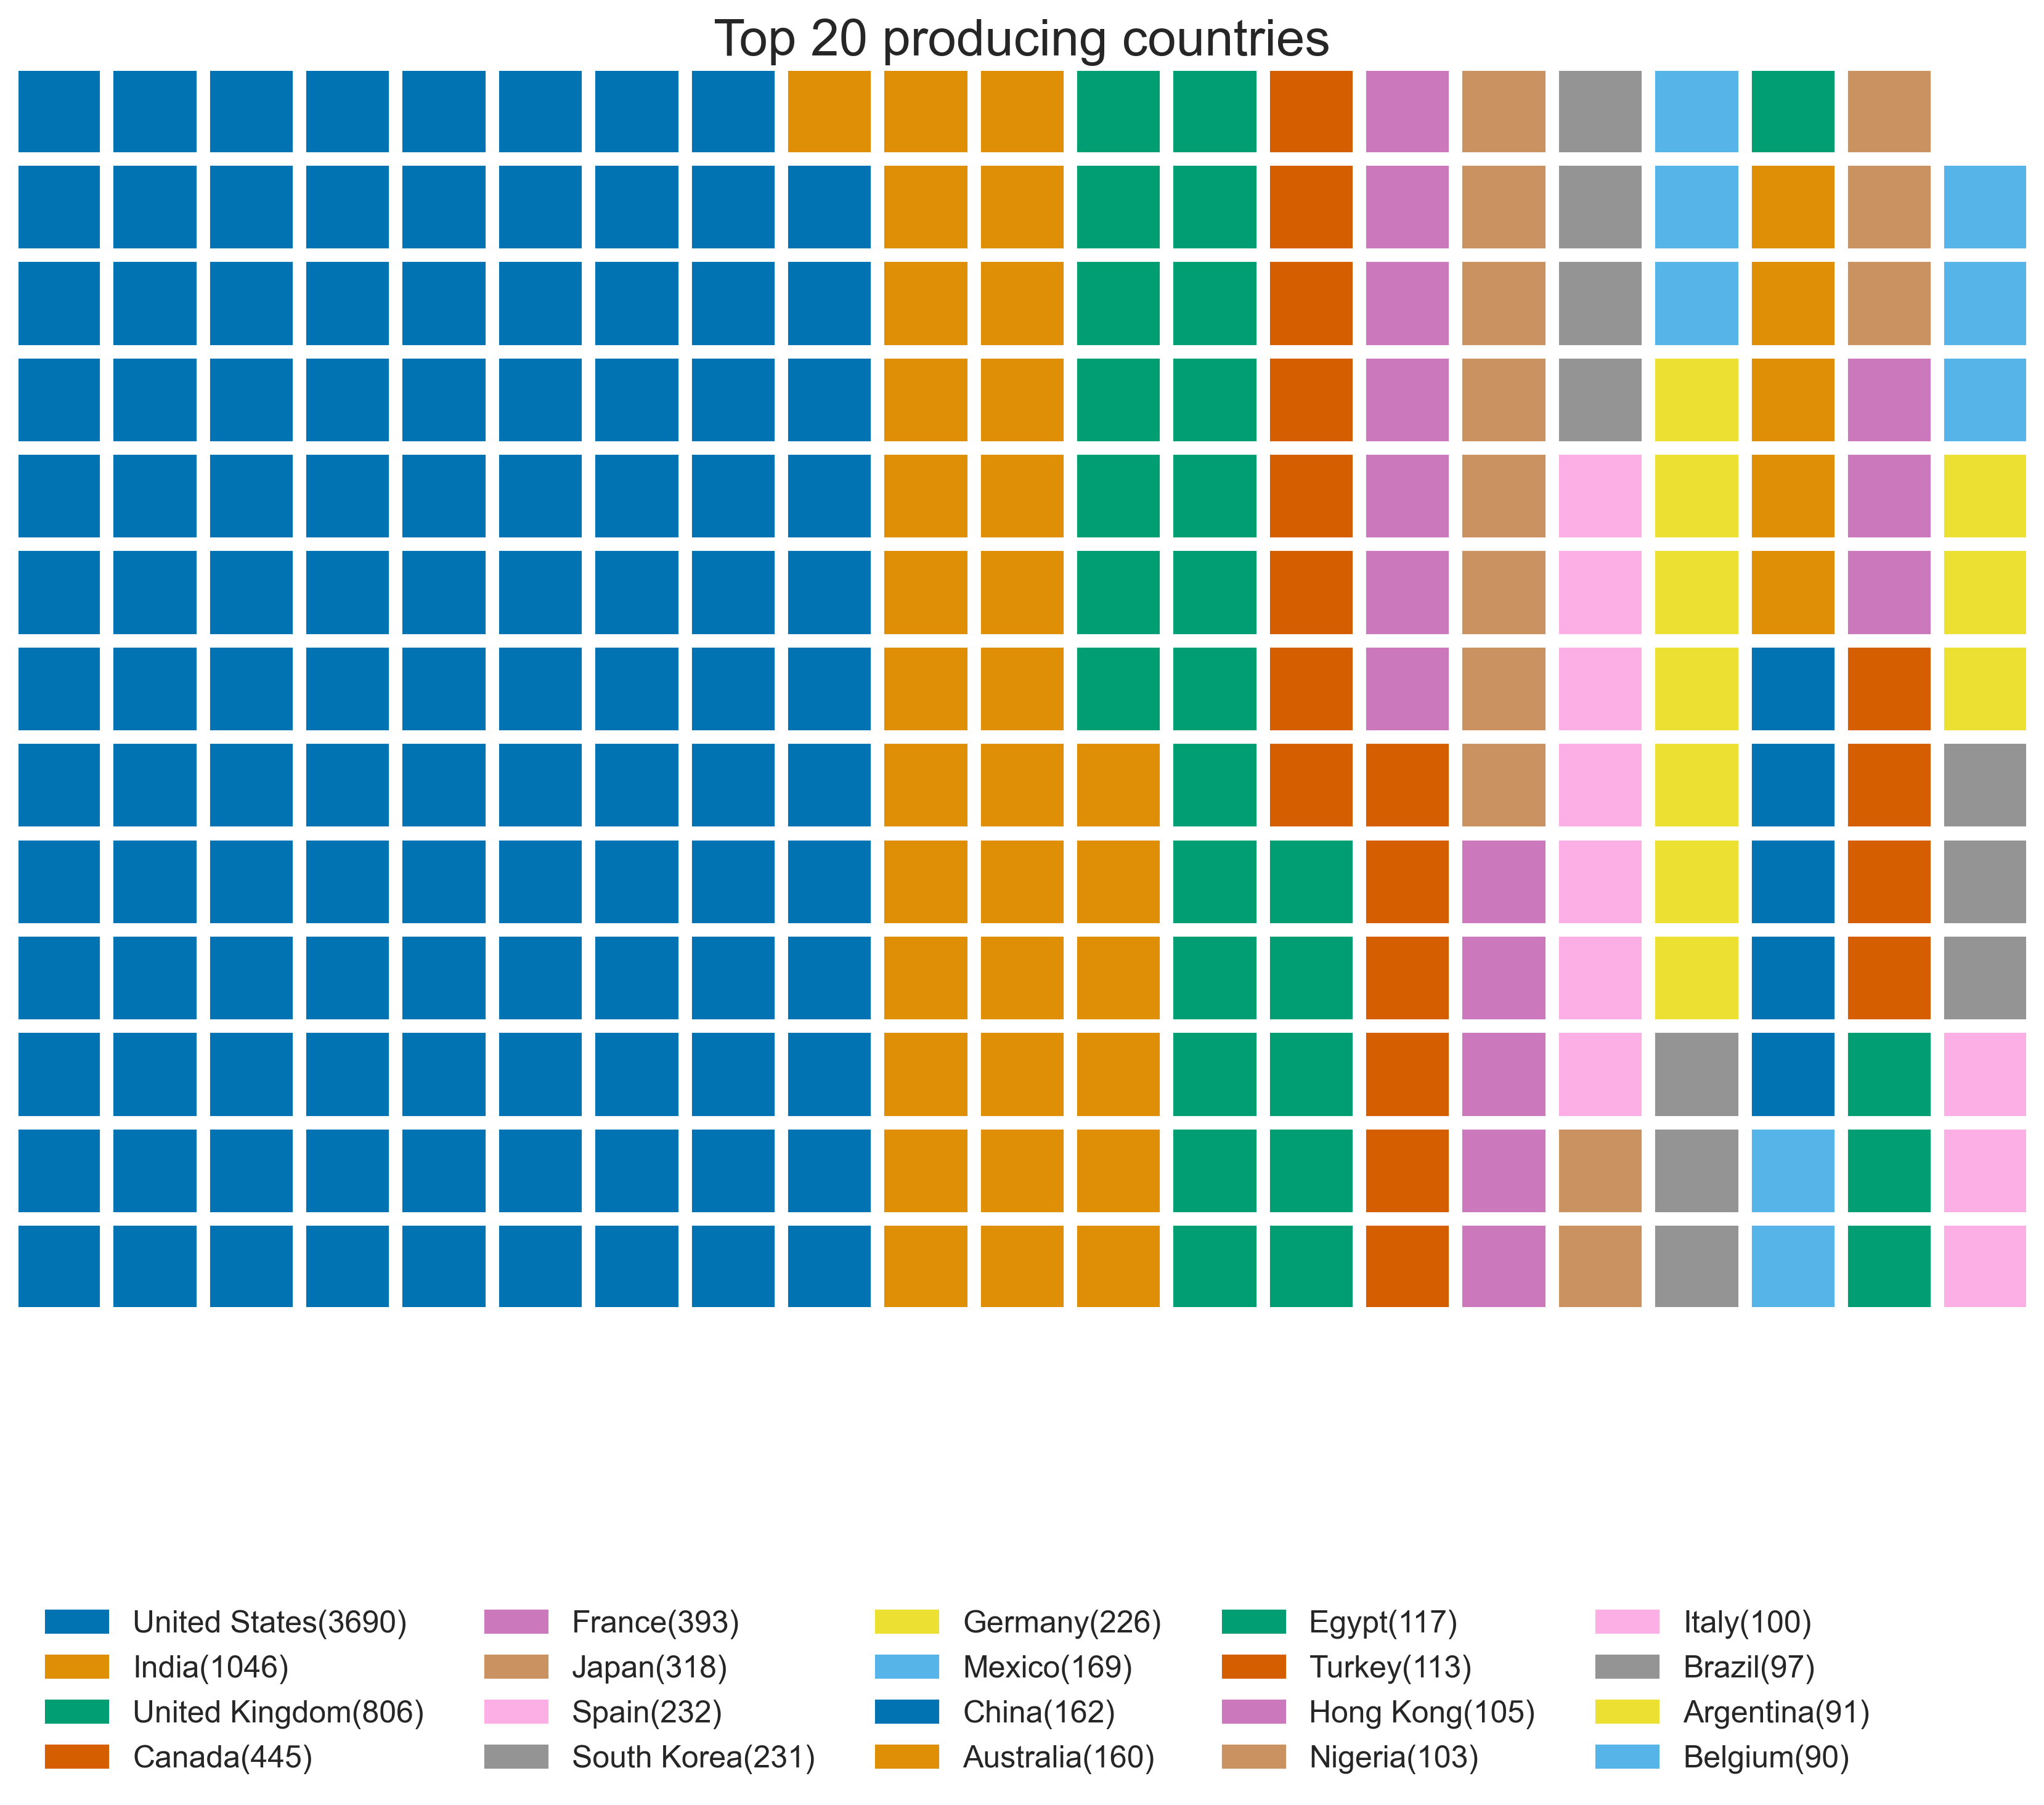

In [25]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=13,
    columns=21,
    values=y,
    labels=["{}({})".format(a, b) for a, b in zip(y.index, y)],
    colors=sns.color_palette("colorblind", n_colors=20),
    legend={
        "loc": "lower left",
        "bbox_to_anchor": (0, -0.4),
        "ncol": len(y) // 4,
        "framealpha": 0,
    },
    font_size=20,
    figsize=(12, 12),
    icon_legend=True,
)

plt.title("Top 20 producing countries", fontsize=20)
plt.show()


    Comparison by country for time

In [26]:
import altair as alt

In [27]:
data["country"] = (
    data["country"]
    .dropna()
    .apply(lambda x: x.replace(" ,", ",").replace(", ", ",").split(","))
)
lst_col = "country"
data2 = pd.DataFrame(
    {
        col: np.repeat(data[col].values, data[lst_col].str.len())
        for col in data.columns.drop(lst_col)
    }
).assign(**{lst_col: np.concatenate(data[lst_col].values)})[data.columns.tolist()]


In [28]:
year_country = (
    data2.groupby("year_added")["country"].value_counts().reset_index(name="counts")
)
year_country["top20"] = year_country["country"].apply(
    lambda x: x in top20_country.index
)

year_country = year_country[
    (year_country["year_added"] >= 1990)
    & year_country["top20"]
    & (year_country["year_added"] < 2020)
]

alt.Chart(year_country).mark_area().encode(
    alt.X("year_added"),
    alt.Y("counts:Q", stack="center", axis=None),
    alt.Color(
        "country:N", scale=alt.Scale(scheme="redgrey"), sort=list(top20_country.index)
    ),
).properties(height=350, width=600)


alt.Chart(...)

<center><h3>We call this graph a <b>"streamgraph"</b>. It has the advantage of being able to express the overall distribution, but no specific comparison is possible.</h3></center>

<center><h3>It's clearer that it's soared between 2015 and 2016.</h3></center>


In [29]:
alt.Chart(year_country).mark_area().encode(
    alt.X("year_added"),
    alt.Y("counts:Q", stack="normalize"),
    alt.Color(
        "country:N", scale=alt.Scale(scheme="redgrey"), sort=list(top20_country.index)
    ),
).properties(height=350, width=600)


alt.Chart(...)

<center><h3>Clearly, the <strong>United States</strong>, <strong>India</strong>, and the <strong>United Kingdom</strong> have a high percentage of content. (redddddd)</h3></center>

In [30]:
import plotly.express as px

year_country2 = (
    data2.groupby("year_added")["country"].value_counts().reset_index(name="counts")
)

fig = px.choropleth(
    year_country2,
    locations="country",
    color="counts",
    locationmode="country names",
    animation_frame="year_added",
    range_color=[0, 200],
    color_continuous_scale=px.colors.sequential.OrRd,
)

fig.update_layout(title="Comparison by country")
fig.show()


    Movie & TV show (Genre)

In [31]:
from sklearn.preprocessing import MultiLabelBinarizer  # Similar to One-Hot Encoding


def relation_heatmap(df, title):
    df["genre"] = df["listed_in"].apply(
        lambda x: x.replace(" ,", ",").replace(", ", ",").split(",")
    )
    Types = []
    for i in df["genre"]:
        Types += i
    Types = set(Types)
    print(f"There are {len(Types)} types in the Netflix {title} Dataset")
    test = df["genre"]
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 14))
    pl = sns.heatmap(
        corr,
        mask=mask,
        cmap="coolwarm",
        vmax=0.5,
        vmin=-0.5,
        center=0,
        square=True,
        linewidths=0.7,
        cbar_kws={"shrink": 0.6},
    )

    plt.show()


    Movie Genre Relation

There are 20 types in the Netflix Movie Dataset


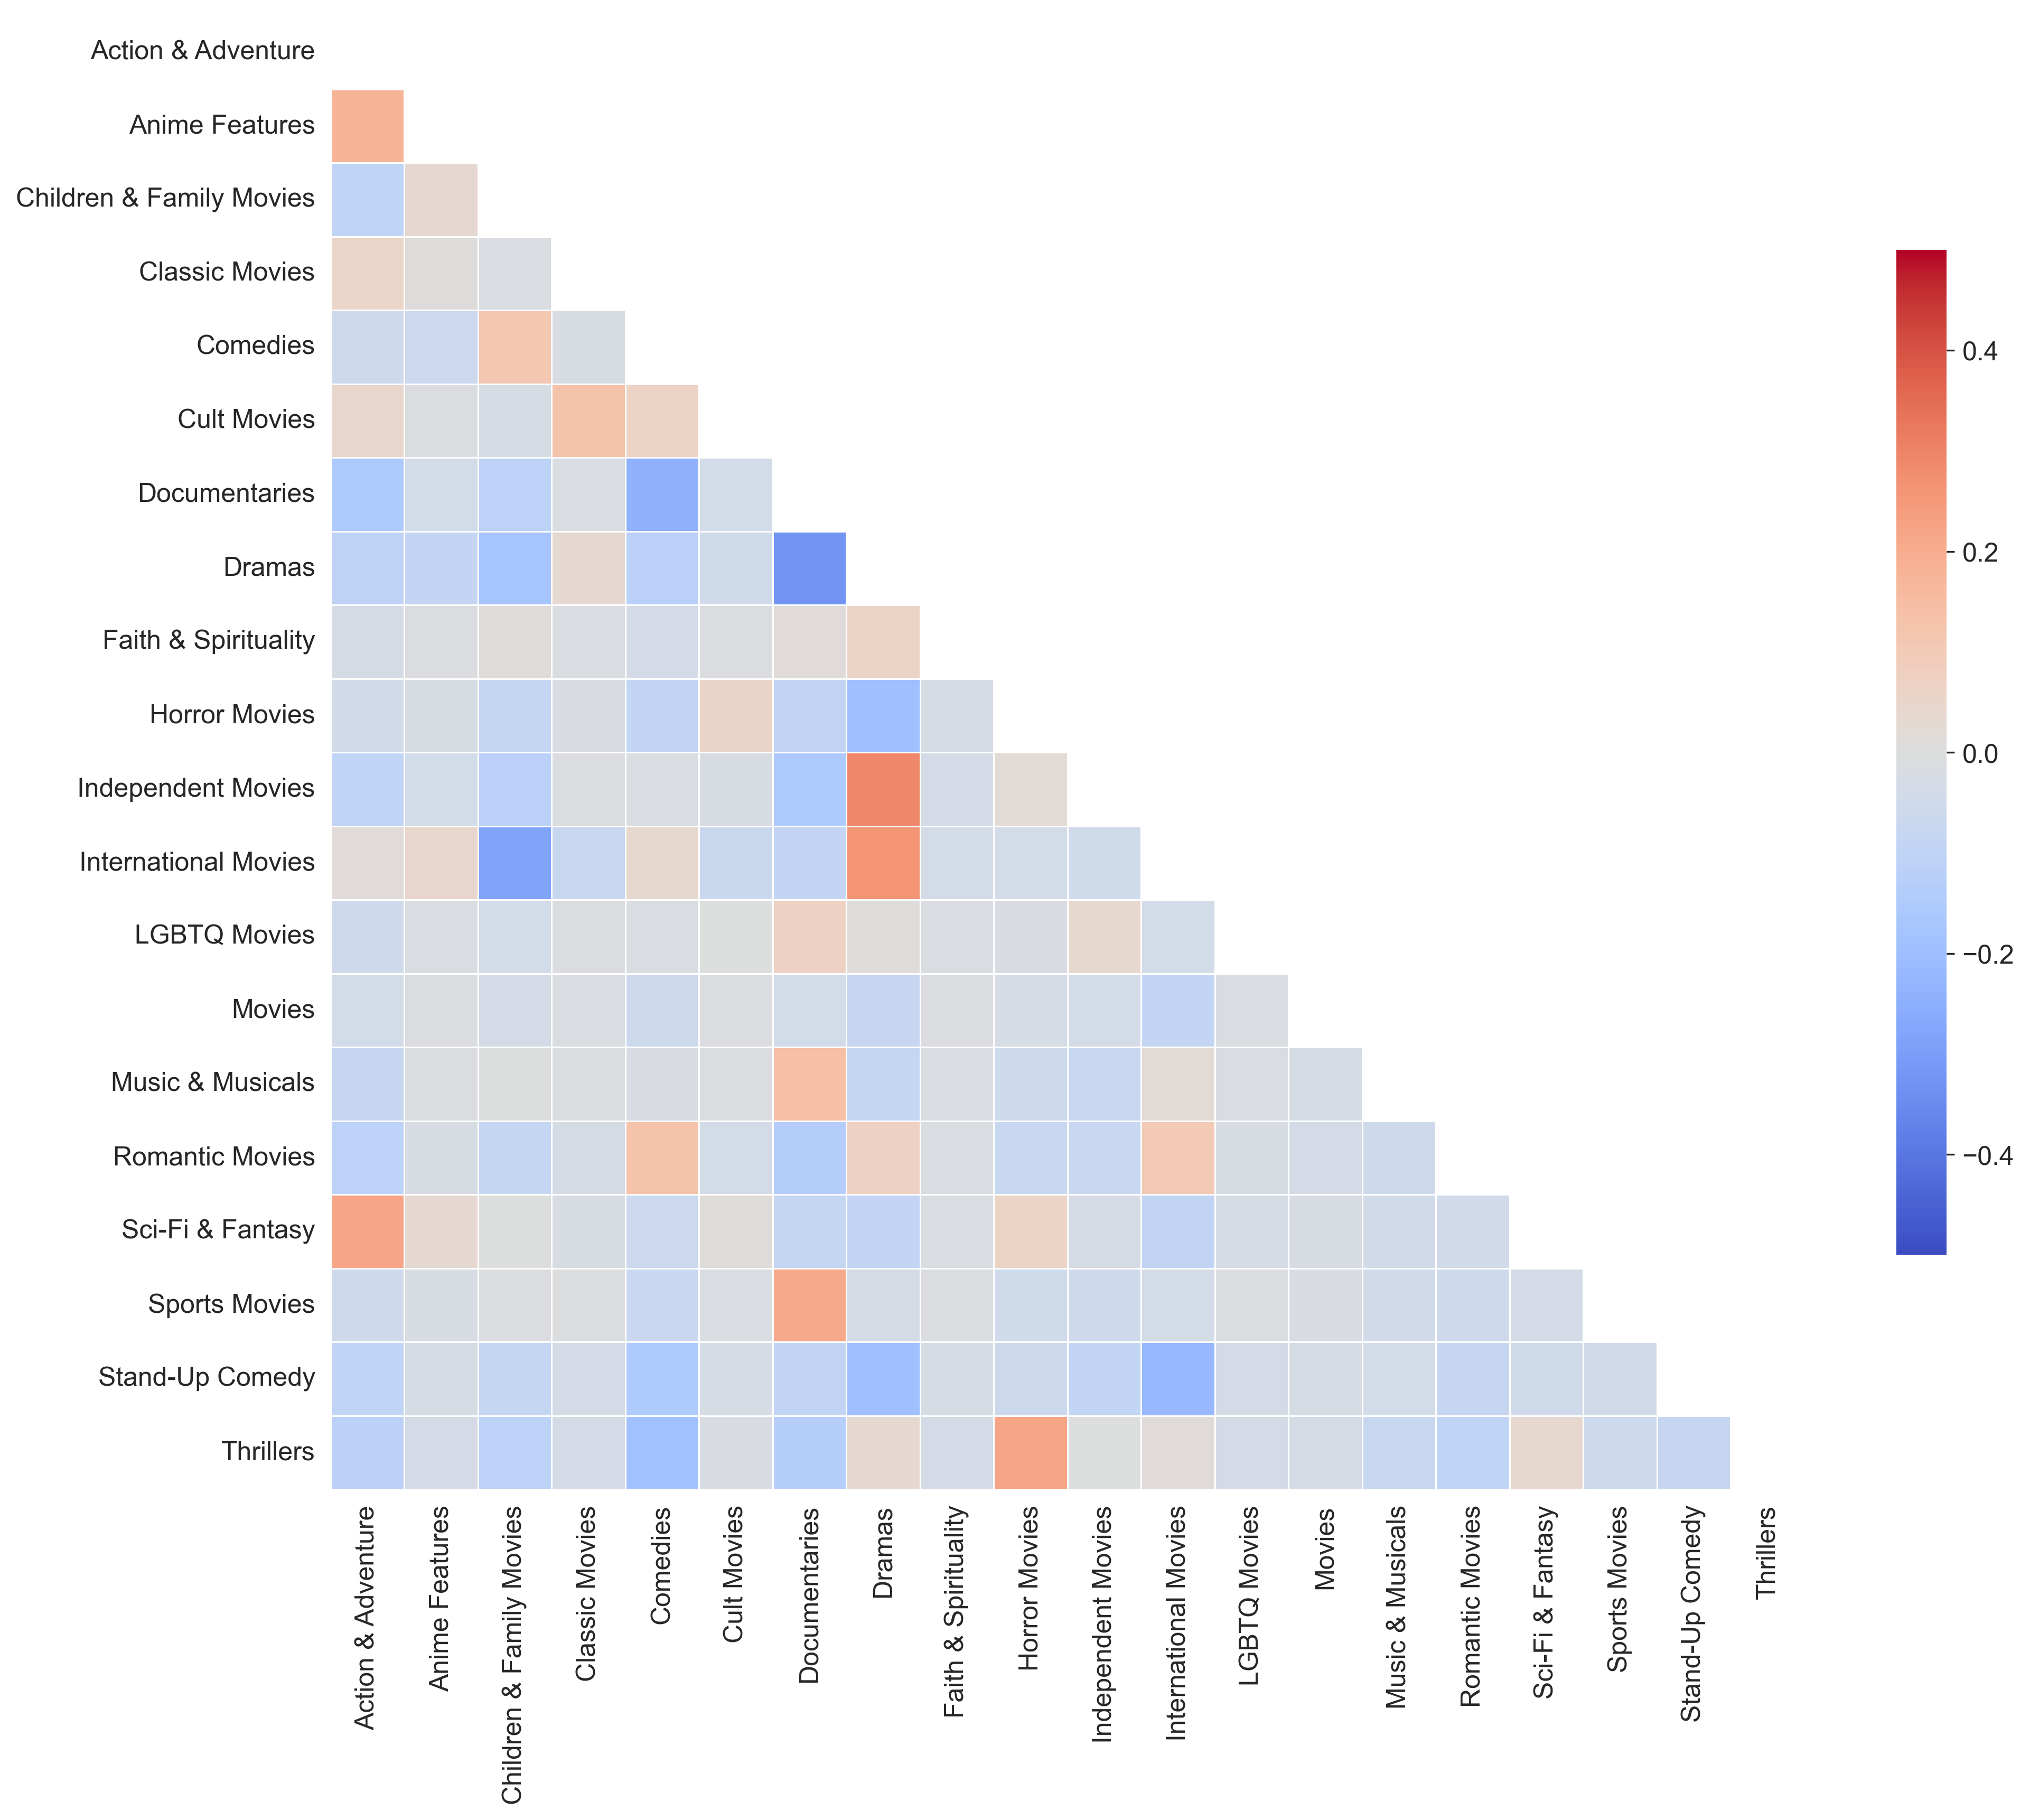

Image saved successfully


In [47]:
relation_heatmap(movie, "Movie")

try:
    image_name = "heatmap_movie_genre.svg"
    fig.savefig(r"images/"+image_name, image_format=image_format, dpi=1200)
    print("Image saved successfully")
except Exception as e:
    print(e)

    TV Show Genre Relation

There are 22 types in the Netflix TV Show Dataset


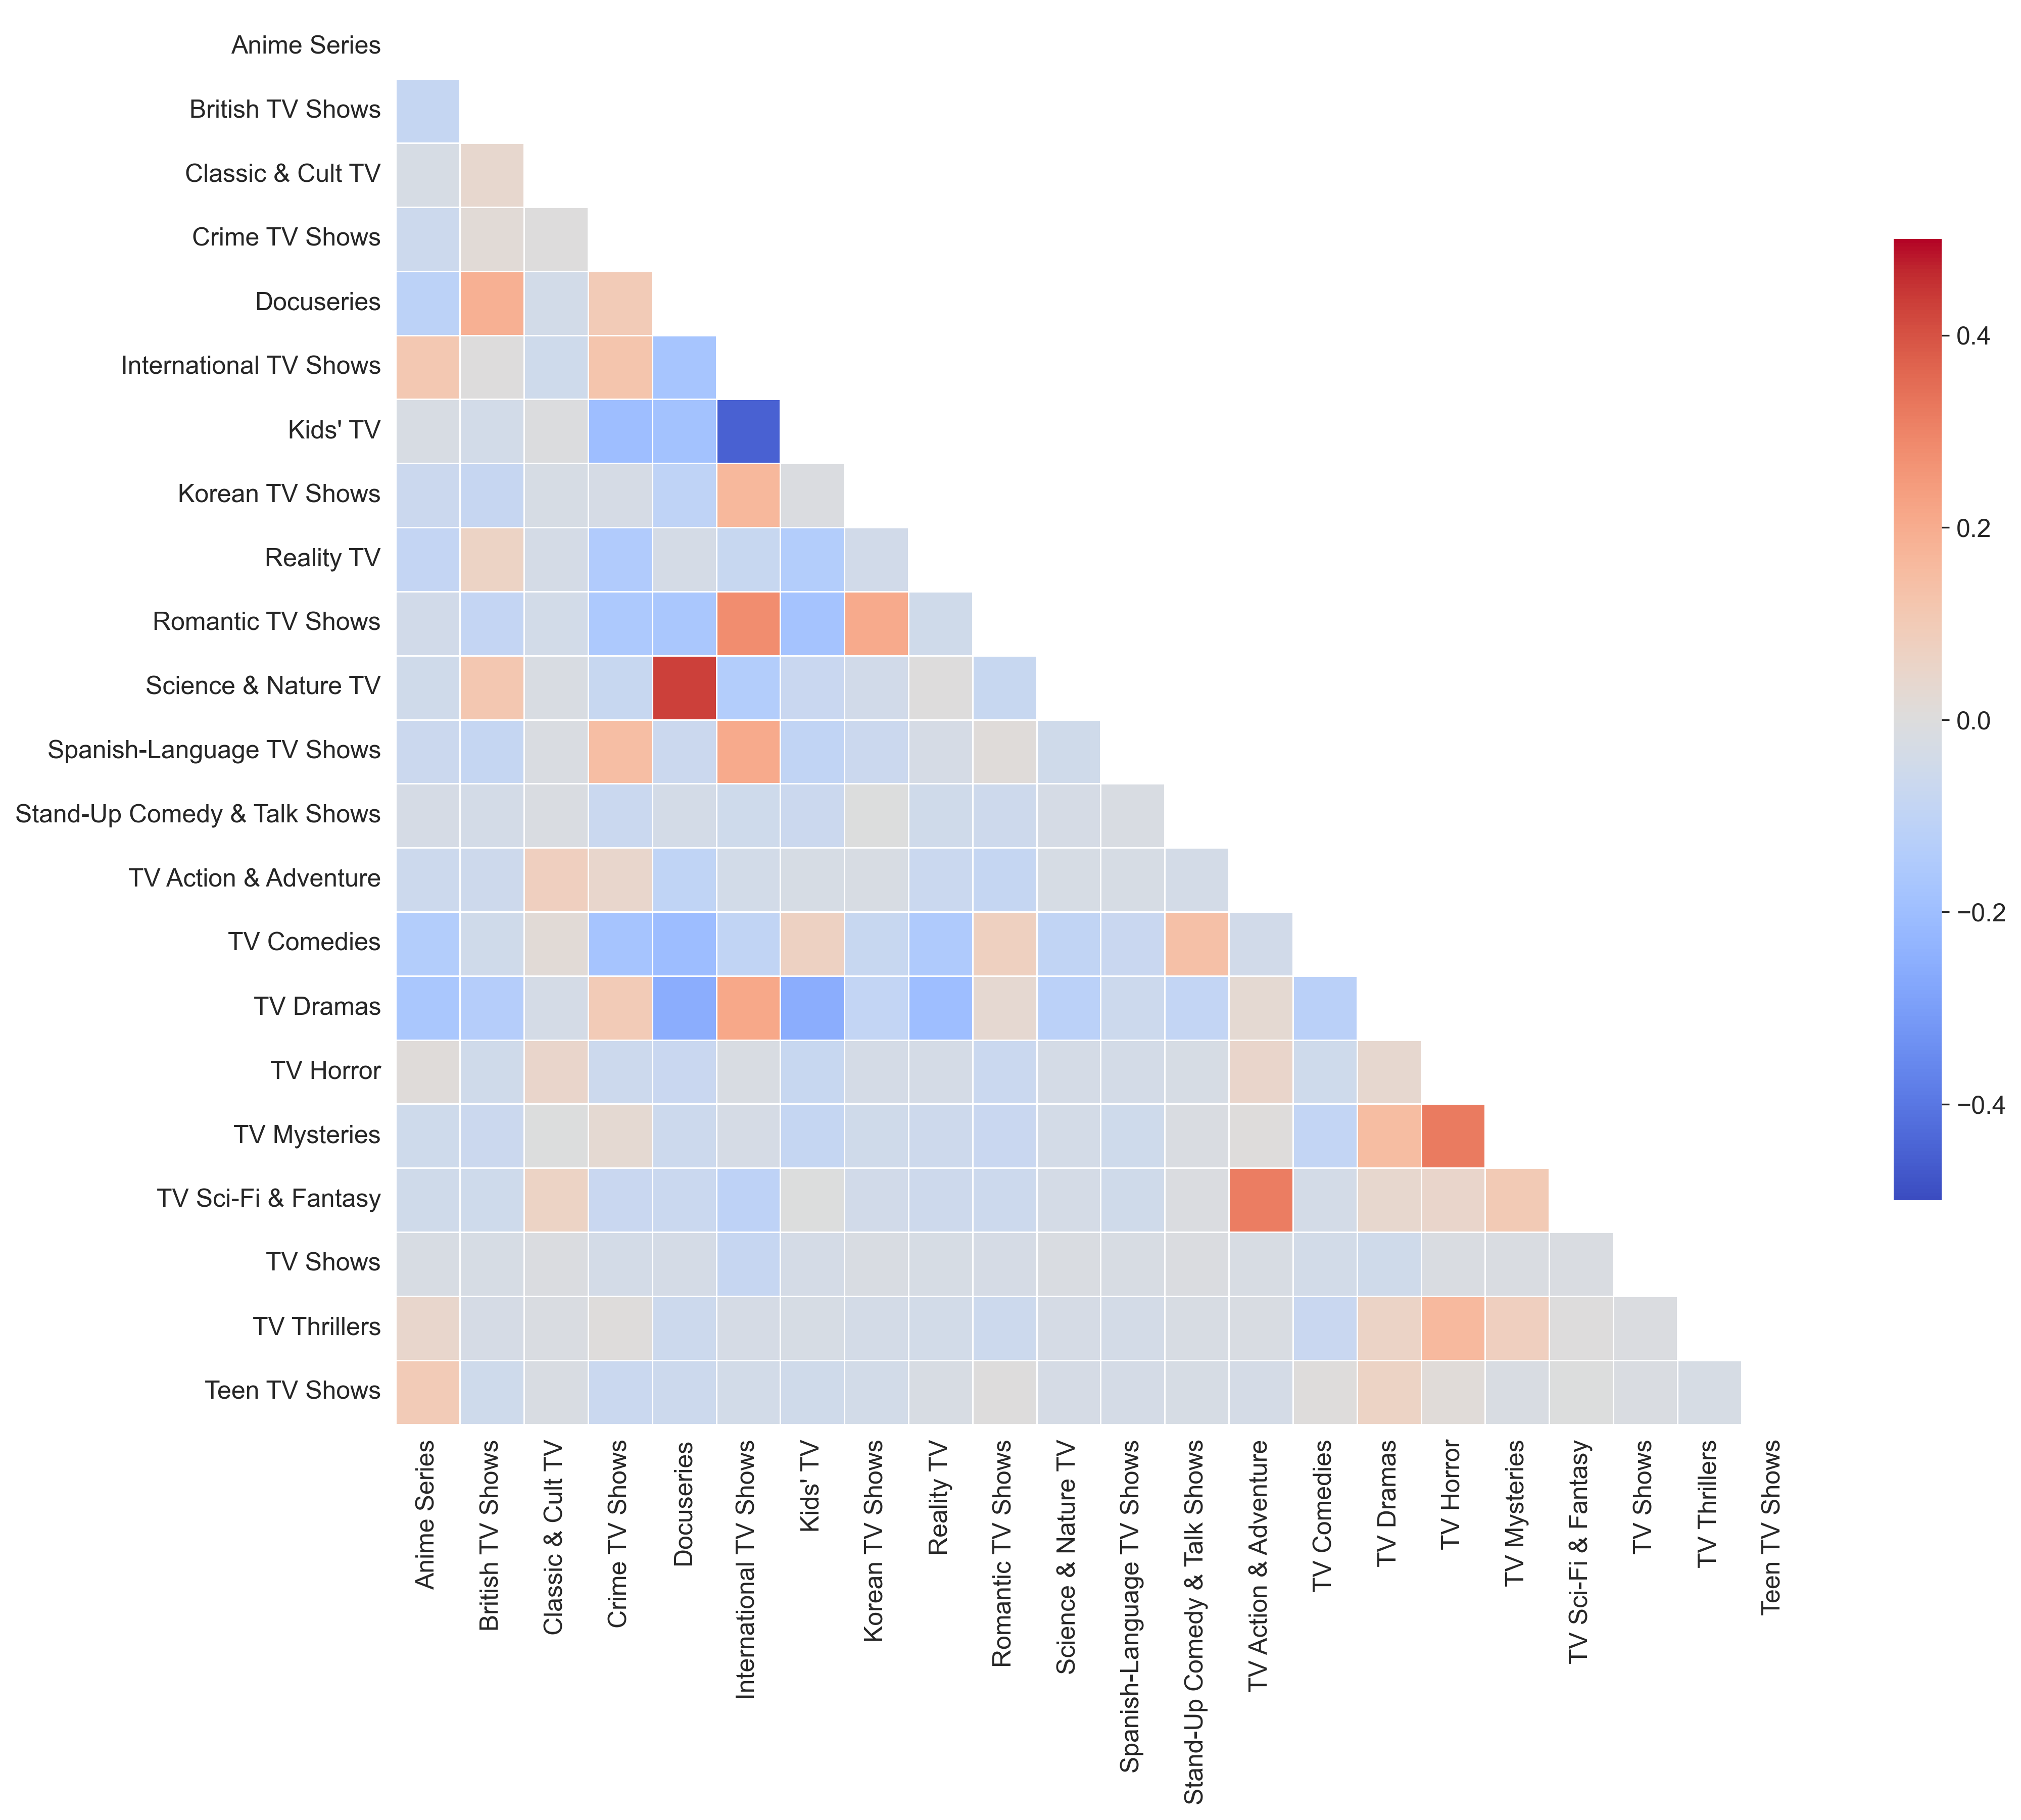

Image saved successfully


In [48]:
relation_heatmap(tv_show, "TV Show")

try:
    image_name = "heatmap_tv_show_genre.svg"
    fig.savefig(r"images/"+image_name, image_format=image_format, dpi=1200)
    print("Image saved successfully")
except Exception as e:
    print(e)


<center><h3><code>TV shows</code> are more clearly correlated than <code>movies</code>.</h3></center>